In [1]:
import numpy as np
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys, tf2sos_analog, pretty_print_SOS, pretty_print_bicuad_omegayq
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

In [2]:
alfa_max = 2.5
wn=6000
ws1=600
ws2=60000
ws1n=ws1/wn
ws2n=ws2/wn
Q=3
BWn=1/Q

In [3]:
ws1n, ws2n

(0.1, 10.0)

In [4]:
omegas1=Q*(ws1n**2-1)/(ws1n)
omegas1

-29.699999999999996

In [5]:
omegas2=Q*(ws2n**2-1)/(ws2n)
omegas2

29.7

In [6]:
ee = 10**(alfa_max/10)-1
ws=29.7
for nn in range(1,9):
    
    alfa_min_b = 10*np.log10(1 + ee * ws**(2*nn))
    alfa_min_c = 10*np.log10(1 + ee * np.cosh(nn * np.arccosh(ws))*2 )
    
    print( 'nn {:d} - alfa_min_butter {:f} - alfa_min_cheby {:f}'.format(nn, alfa_min_b, alfa_min_c) )

nn 1 - alfa_min_butter 28.372806 - alfa_min_cheby 16.742161
nn 2 - alfa_min_butter 57.821621 - alfa_min_cheby 34.386204
nn 3 - alfa_min_butter 87.276742 - alfa_min_cheby 52.121281
nn 4 - alfa_min_butter 116.731871 - alfa_min_cheby 69.857888
nn 5 - alfa_min_butter 146.187000 - alfa_min_cheby 87.594521
nn 6 - alfa_min_butter 175.642129 - alfa_min_cheby 105.331154
nn 7 - alfa_min_butter 205.097258 - alfa_min_cheby 123.067787
nn 8 - alfa_min_butter 234.552387 - alfa_min_cheby 140.804420


In [7]:
nn=1

z,p,k = sig.cheb1ap(nn, alfa_max)
num_cheb, den_cheb = sig.zpk2tf(z,p,k)

In [8]:
num_bp, den_bp = sig.lp2bp(num_cheb, den_cheb,bw=1/Q)

In [9]:
sos_bp = tf2sos_analog(num_bp, den_bp)

In [10]:
num_bp, den_bp

(array([0.37784265, 0.        ]), array([1.        , 0.37784265, 1.        ]))

In [11]:
sos_bp

array([[0.        , 0.37784265, 0.        , 1.        , 0.37784265,
        1.        ]])

In [12]:
pretty_print_SOS(sos_bp, mode='omegayq')

<IPython.core.display.Math object>

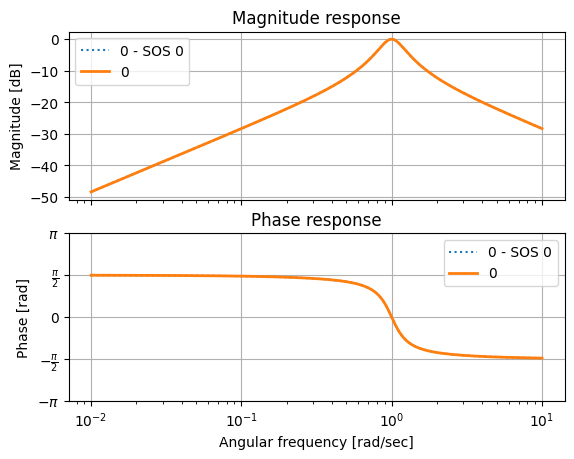

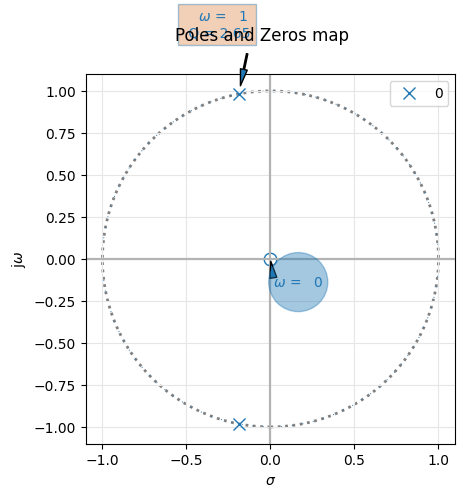

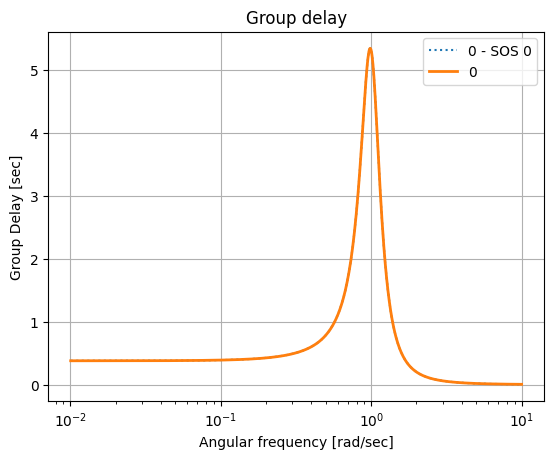

In [13]:
analyze_sys(sos_bp)

In [14]:
alfa_max = 2.5
ws = 13/6
wn=6000
w1=600
w2=60000
w1n=w1/wn
w2n=w2/wn

#BW=(w2-w1)
BW=2000

In [15]:
num_bp, den_bp = sig.lp2bp(num_cheb, den_cheb,wo=wn,bw=BW)

In [16]:
sos_bp = tf2sos_analog(num_bp, den_bp)

In [17]:
pretty_print_SOS(sos_bp, mode='omegayq')

<IPython.core.display.Math object>

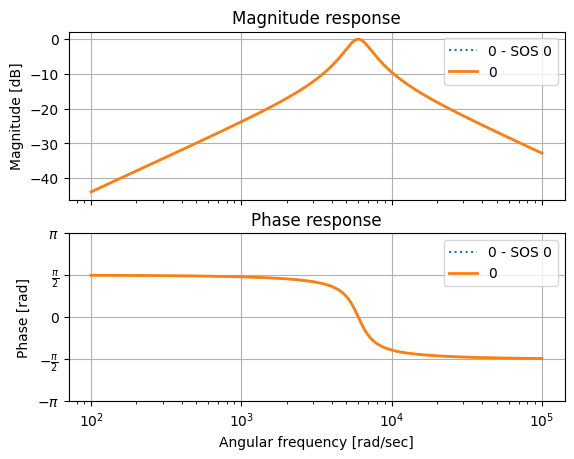

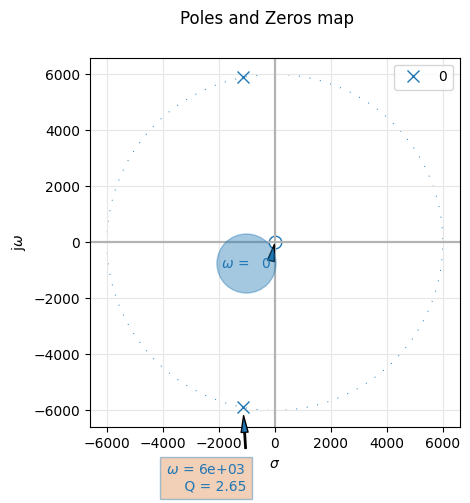

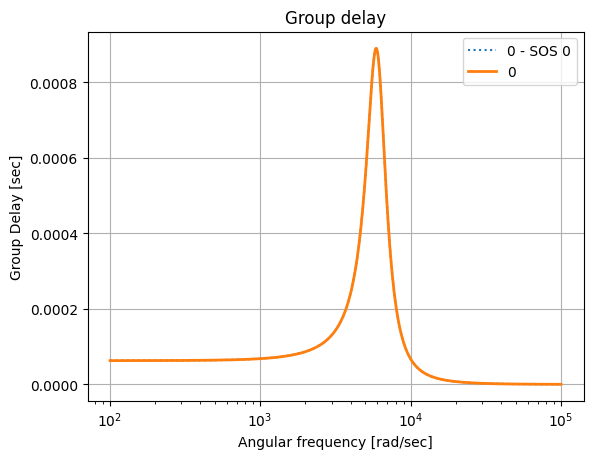

In [18]:
analyze_sys(sos_bp)

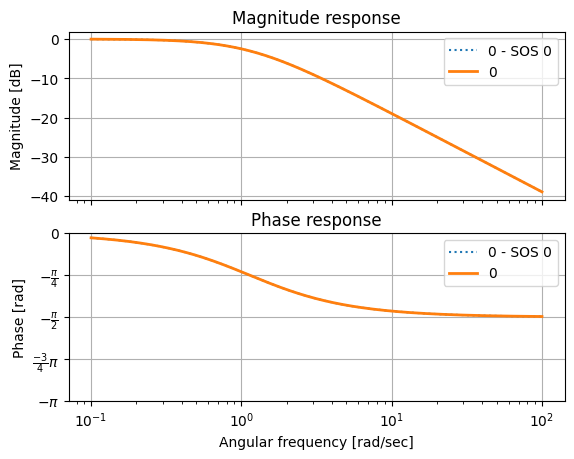

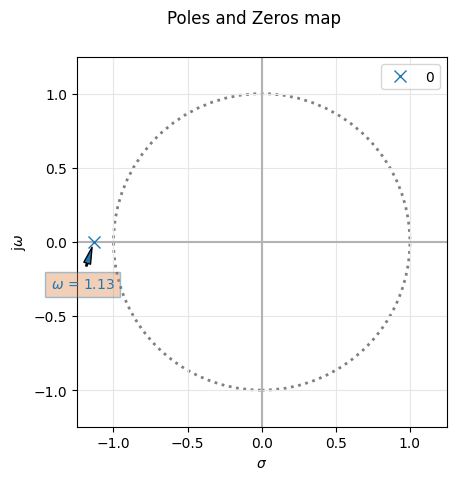

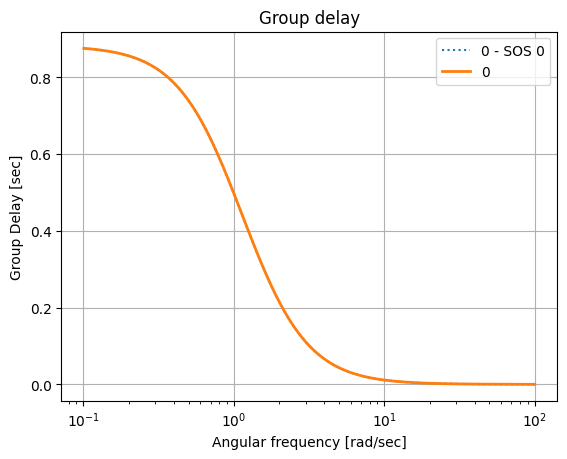

In [19]:
sos_lp = tf2sos_analog(num_cheb,den_cheb)
analyze_sys(sos_lp)

In [20]:
pretty_print_SOS(sos_lp)

<IPython.core.display.Math object>